# Discriminant Analysis: sklearn, load_digits
## 1. Load packages

In [25]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.datasets import load_digits

## 2. Load handwritten digits dataset, and split into training and testing

In [26]:
digits = load_digits()

X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y, random_state=1)

## 3. Plot a few examples

3


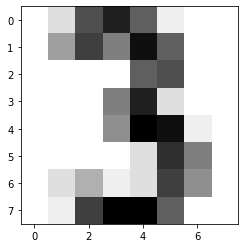

In [27]:
plt.imshow(X_train[2].reshape(8,8), plt.cm.binary)
print(y_train[2])

## 4. Train an LDA model

In [28]:
lda = LDA().fit(X_train, y_train)

preds = lda.predict(X_test)
probs = lda.predict_proba(X_test)

## 5. Print metrics

In [29]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.88      0.91      0.89        55
           2       0.98      0.98      0.98        53
           3       0.98      0.91      0.94        55
           4       1.00      0.93      0.96        54
           5       0.96      0.95      0.95        55
           6       0.96      0.98      0.97        54
           7       0.96      0.96      0.96        54
           8       0.88      0.87      0.87        52
           9       0.87      1.00      0.93        54

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



In [30]:
accuracy_score(y_test, preds)

0.9462962962962963

In [37]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [70]:
clf=SVC(probability=True, random_state=1, kernel='linear')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [71]:
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)

In [72]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.93      0.98      0.96        55
           2       1.00      1.00      1.00        53
           3       1.00      0.96      0.98        55
           4       0.98      1.00      0.99        54
           5       0.96      0.96      0.96        55
           6       0.98      0.98      0.98        54
           7       0.96      1.00      0.98        54
           8       0.94      0.88      0.91        52
           9       0.96      0.96      0.96        54

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



In [73]:
preds

array([1, 3, 7, 0, 4, 8, 6, 7, 1, 1, 9, 6, 4, 9, 3, 7, 9, 8, 5, 3, 5, 4,
       2, 8, 2, 0, 7, 2, 9, 7, 2, 9, 6, 7, 1, 6, 9, 3, 1, 9, 5, 5, 5, 7,
       5, 4, 6, 9, 5, 6, 8, 4, 4, 9, 6, 1, 2, 1, 3, 6, 7, 7, 5, 2, 3, 2,
       9, 4, 8, 5, 0, 9, 9, 1, 6, 4, 4, 7, 1, 3, 3, 9, 5, 6, 0, 5, 8, 6,
       7, 5, 7, 8, 4, 3, 3, 9, 7, 4, 5, 4, 7, 4, 3, 1, 8, 9, 6, 2, 8, 2,
       8, 5, 6, 9, 5, 5, 0, 0, 4, 0, 6, 7, 5, 1, 7, 3, 0, 4, 9, 0, 3, 5,
       0, 9, 3, 7, 9, 4, 2, 4, 2, 6, 9, 5, 9, 3, 1, 2, 3, 2, 6, 3, 6, 2,
       0, 7, 4, 4, 8, 8, 4, 3, 8, 3, 8, 0, 1, 7, 5, 6, 7, 5, 2, 6, 0, 7,
       1, 0, 7, 2, 6, 2, 0, 0, 7, 1, 8, 0, 6, 3, 0, 0, 7, 5, 5, 3, 9, 0,
       0, 5, 3, 7, 8, 5, 3, 9, 9, 8, 6, 1, 9, 0, 2, 6, 5, 6, 0, 9, 7, 1,
       0, 8, 3, 0, 6, 9, 5, 3, 3, 9, 4, 4, 3, 9, 3, 9, 2, 2, 7, 8, 8, 6,
       1, 0, 1, 2, 8, 4, 1, 9, 6, 5, 9, 6, 8, 4, 9, 0, 7, 5, 3, 1, 1, 6,
       9, 7, 5, 6, 2, 7, 4, 4, 4, 6, 9, 2, 4, 0, 7, 5, 7, 8, 1, 6, 9, 2,
       7, 5, 2, 5, 0, 2, 4, 7, 1, 1, 7, 2, 2, 6, 3,

8


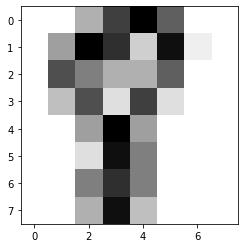

In [77]:
plt.imshow(X_test[77].reshape(8,8), plt.cm.binary)
print(y_test[77])

In [75]:
y_test

array([1, 3, 7, 0, 4, 8, 6, 7, 1, 1, 9, 6, 4, 9, 3, 7, 9, 8, 5, 3, 5, 4,
       2, 8, 2, 0, 7, 2, 9, 7, 2, 9, 6, 7, 1, 6, 9, 3, 1, 9, 5, 5, 5, 7,
       5, 4, 6, 9, 5, 6, 8, 4, 4, 9, 6, 1, 2, 1, 3, 6, 7, 7, 5, 2, 3, 2,
       9, 4, 8, 5, 0, 9, 9, 1, 6, 4, 4, 8, 1, 3, 3, 9, 5, 6, 0, 5, 8, 6,
       7, 5, 7, 8, 4, 3, 3, 9, 7, 4, 5, 4, 7, 4, 3, 1, 8, 9, 6, 2, 8, 2,
       8, 5, 6, 9, 5, 5, 0, 0, 4, 0, 6, 7, 5, 1, 7, 3, 0, 4, 9, 0, 3, 5,
       0, 9, 3, 7, 9, 4, 2, 4, 2, 6, 9, 5, 9, 3, 1, 2, 3, 2, 6, 3, 6, 2,
       0, 7, 4, 4, 8, 8, 4, 3, 8, 3, 8, 0, 8, 7, 5, 6, 7, 5, 2, 6, 0, 7,
       1, 0, 7, 2, 6, 2, 0, 0, 7, 1, 8, 0, 6, 3, 0, 0, 7, 5, 5, 3, 9, 0,
       0, 5, 3, 7, 9, 5, 3, 9, 9, 8, 6, 1, 9, 0, 2, 6, 5, 6, 0, 9, 7, 8,
       0, 8, 3, 0, 6, 9, 5, 3, 3, 5, 4, 4, 3, 9, 3, 8, 2, 2, 7, 8, 8, 6,
       1, 0, 1, 2, 8, 4, 1, 9, 6, 5, 9, 6, 8, 4, 9, 0, 7, 5, 3, 1, 1, 6,
       9, 7, 5, 6, 2, 7, 4, 4, 4, 6, 9, 2, 4, 0, 7, 5, 7, 8, 1, 6, 9, 2,
       7, 5, 2, 5, 0, 2, 0, 7, 1, 1, 7, 2, 2, 6, 3,

In [76]:
np.where(y_test != preds)

(array([ 77, 166, 202, 219, 229, 235, 292, 303, 319, 353, 354, 394, 442,
        460, 481]),)

In [48]:
qda = QDA().fit(X_train, y_train)
qda.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [49]:
preds = qda.predict(X_test)
probs = qda.predict_proba(X_test)[:, 1]

In [50]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       1.00      0.25      0.41        55
           2       0.93      0.94      0.93        53
           3       0.81      0.85      0.83        55
           4       0.93      0.78      0.85        54
           5       0.83      0.96      0.89        55
           6       0.90      0.98      0.94        54
           7       0.77      0.98      0.86        54
           8       0.52      0.87      0.65        52
           9       0.97      0.67      0.79        54

    accuracy                           0.83       540
   macro avg       0.87      0.83      0.81       540
weighted avg       0.87      0.83      0.81       540



In [66]:
clf=SVC(probability=True, random_state=1, gamma='scale')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [67]:
preds = clf.predict(X_test)
probs = clf.predict_proba(X_test)

In [68]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       0.96      1.00      0.98        55
           2       1.00      1.00      1.00        53
           3       1.00      0.96      0.98        55
           4       1.00      0.98      0.99        54
           5       0.96      0.96      0.96        55
           6       0.98      1.00      0.99        54
           7       0.96      1.00      0.98        54
           8       1.00      0.94      0.97        52
           9       0.96      0.98      0.97        54

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

